# Random Forest
**Notebook 2 of 3**

In this tutorial we will look at how the Decision Tree algorithm works to make predictions. We will look at data about the Iris flower, a genus of about 300 species of plants in the family Iridaceae, that is very polpular in gardens accross global temperature zones. These are many species of plants that would take a long time to manually identify, so we want to create a model that can help us predict which class of iris the flower belongs to based on its features.
To be able to do this, we need data on the various classes of the iris and its key features. Fortunately, there are a lot of datasets for this purpose. We will access Open Data sources, verify the data for structure and consistency, and clean up any spelling or formatting errors that would impair a computing process, and enrich the data with any additional values that you need to produce accurate results.

For actually using the data we use simple Machine Learning models known as Decision Trees which can make predictions of output data based on previously unseen input data.  They work by splitting the data into groups like splitting a population based on hair colour, favourite food, favourite subject and so on creating a tree structure.  When new input data is passed to the model, the decision tree places it in the right group to preduct an outcome.  We will then expand on the notion to the Random Forest model which is made up a several trees on different chunks of data and vote on the answer to get more accurate predictions.

But where do we get our data? The University of California Irvine's Open Data website has a small data sets suitable to get our training data and test data. We have already downloaded the datasets and you can find them in the tutorial repository.

# Learning objectives
Average time to complete 30min

By the end of this tutorial you should be able to:
* Clean your data and describe why this is important for machine learning.
* Filling out the missing data, if needed.
* Visualize and analyze data to gain lots of insights into the data.
* Make the decision tree classifier.
* Make prediction with the random forest classifier.
* Visualize how clearly the decision tree model distinguishes the iris classes using decision boundaries.

## What you will need for this tutorial

* See the [introduction document](https://uottawa-it-research-teaching.github.io/machinelearning/) for general requirements and how Jupyter notebooks work.
* We'll need Pandas for convenient data handling. It's a very powerful Python package that can read CSV and Excel files. It also has very good data manipulation capabilities which come in use for data cleaning.
* We will use scikit learn as our machine learning package.
* numpy 
* seaborn 
* matplotlib
* requests
* ipywidgets
* The data files that should have come with this notebook.

## RDM best practices

Good data handling for machine learning begins with good Research Data Managment (RDM). The quality of your source data will impact the outcome of your results, just like the reproducibility of your results will depend on the quality of your data sources, in addition to how you organize the data so that other people (and machines!) can understand and reuse it.

We also need to respect a few research data management best practices along the way, these best practices are recommended by the Digital Research Alliance of Canada. In the first tutorial we encouraged you to 

SAVE YOUR RAW DATA IN ORIGINAL FORMAT<br>
* Don't overwrite your original data with a cleaned version.
* Protect your original data by locking them or making them read-only.
* Refer to this original data if things go wrong (as they often do).<br>

BACKUP YOUR DATA (3-2-1 rule)<br>
* Use the 3-2-1 rule: Save three copies of your data, on two different storage mediums, and one copy off site. The off site storage can be OneDrive or Google drive or whatever your institution provides.
* We are using Open Data, so it does not contain any personally identifiable data or data that needs to be restricted or protected in any way. However, if your data contains confidential information, it is important to take steps to restrict access and encrypt your data.

these practices should apply in this tutorial as well, but we will also look at best practices of data description, documentation and file naming that will streamline your data processing and project management. 

DESCRIBE YOUR DATA

* Machine Friendly: Describe your dataset with a metadata standard for discovery.
* Human Friendly: Describe your variables, so your colleagues will understand what you meant. Data without good metadata is useless. Give your variables clear names.
* Do not leave cells blank -use numeric values clearly out of range to define missing (e.g. '99999') or not applicable (e.g. '88888') data and describe these in your data dictionary.
* Convert your data to open, non-proprietary formats 
* Name your files well with basic meta-data in the file names

## Cleaning your data

We will use Pandas library for our data cleaning since it has veryful power filtering and manipulation tools to get our data formatted to allow for easy analysis. When you use data from other sources the data cleaning process can be time consuming, but it is an important step to ensure that your results are accurate.

In [3]:
# Depending where you are running the code, you may need to install the libraries.
# You can check if the libraries are installed by running !pip list in a cell.
# !pip install sklearn numpy pandas seaborn matplotlib requests ipywidgets

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn import ensemble
from sklearn.metrics import roc_auc_score
from sklearn import datasets
import warnings;
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

We will look at data about the iris flower. We want to predict which species an iris flower belongs to by inputting measurements of the sepal and petal. For a machine learning algorithm, the species will represent the class that the data belongs.

To be able to do this, we need data from various species of the iris flowers and key measurements that we believe to be unique to them. Fortunately, there are a lot of datasets for this purpose. The University of California Irvine's Open Data website has a small data sets suitable to get our training data and test data. Their [Open Data website](https://archive.ics.uci.edu/dataset/53/iris) is very helpful.

#### iris data

The very first step in data cleaning, is reading the data! Make sure you have "data.csv" that should have come with this notebook. If you don't have it, you can download it from the link in the comment below.

As we went through a detailed review of the dataset in notebook 1, we'll just do a cursory overview to ensure the integrity of the data we are working with. we will use a shorter name for the dataset variable to ease the coding.

In [5]:
iris = pd.read_csv('./data.csv')

This data set also follows good RDM practices because the variables of each column are clearly named: The sepal and the petal are two distinct parts to the Iris flower. In this data set structure, sepal length and width are easily understood by a human who has adequate horticultural knowledge to be distinct from the petal length and width, and that all of these data points are necessary to classify the flower as a species of the Iridecae family. Therefore, even if we didn't collect this data ourselves by measuring hundreds of Iris flowers, you can still reuse it with ease.
Since we only want to get a cursory look at the data at this stage, an alternated way to present the data is to just look at the first five rows of data

In [6]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The column names are easily understandable and follow good RDM best practices. This clear documentation of the variables as they correspond to the data collection process helps us to reuse this data!

The summary explains that these columns represent measurements of the iris flowers that data was collected on. 

*Non-null* values are the number of flowers that were measured and classified by their species.<br>
*float64* values indicate double precision 64-bit decimal point number meaning they can take very large or small numbers.<br>
*object* values indicate that the variable contains categorical or textual data rather than numerical.<br>

Notice that we have 150 entries (one for each iris flower), and if we look at the measurements, we see we have 150 non-null values. *This indicates no missing data!*. We also notice that the datatypes for the measurements are all numerical and the same datatype (float64).  This is important since performing math functions can only work with numerical data. The species is textual which is what we expect.

Note that missing data is fairly typical for raw datasets.

Fortunately, we don't have to deal with missing data here.  Visualization is a powerful tool to check the data because it lets you see at a glance if anything weird might be going on.

This requires some level of understanding of the data you are working with. For complicated datasets, visualizations can be quite difficult and would require some domain expertise, but it pays off to visualize because of the insights that it can bring.

In this case, we are measuring petal and sepal lengths and widths, so no expertise required in this case! Let's plot some of the data.

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
# number of instances in each class
iris.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

Our 150 rows dataset is divided in 50, 50 and 50 split among species so that tells us that all the data is evenly divided with regards to the species.

<Axes: xlabel='species', ylabel='count'>

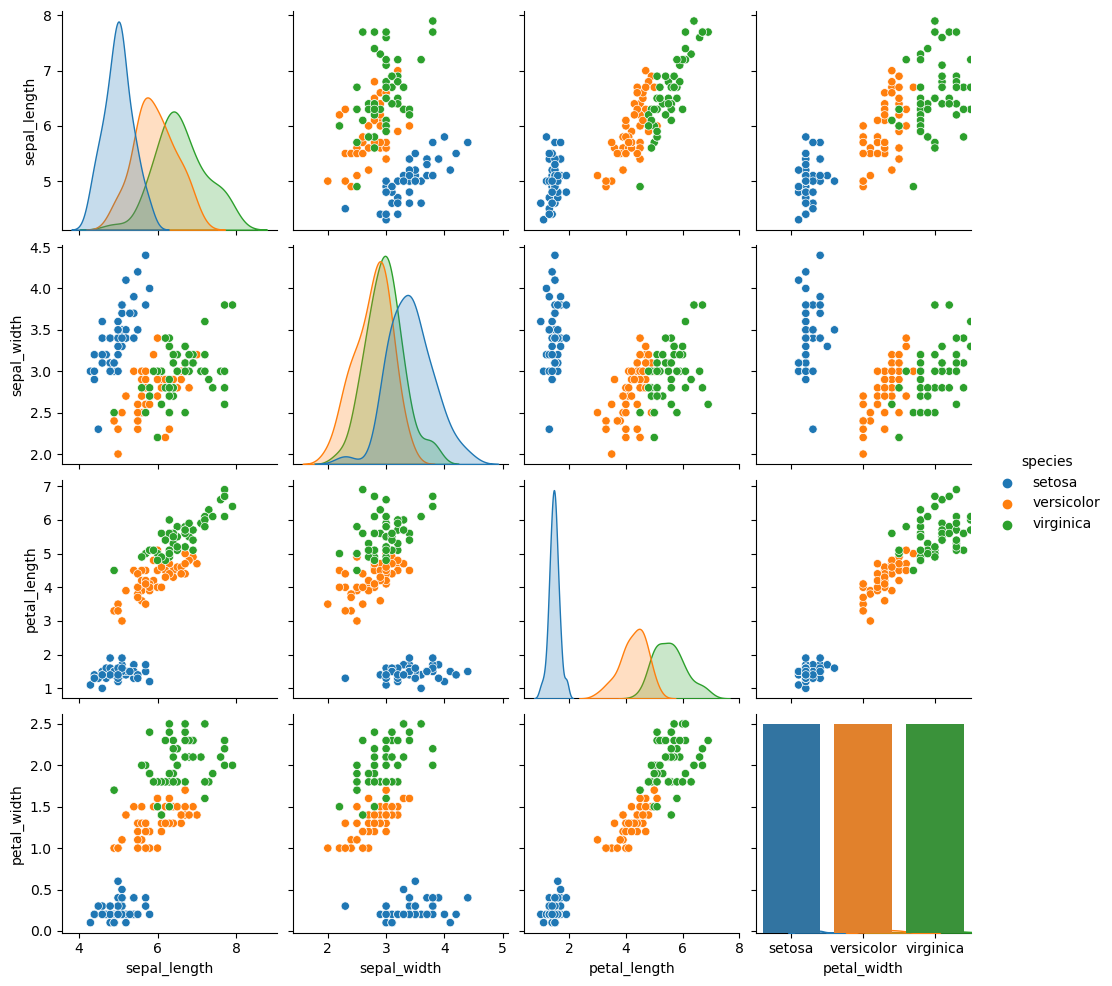

In [9]:
sns.pairplot(iris,hue='species')

sns.countplot(x = 'species', data = iris)

As noted in the previous notebook, by looking at the result of pair plot we notice that Setosa is clearly separated from the other species.  Satosa species will be the easiest species for the decision tree to predict

Virginica and Versicolor species have some overlap especially for the charts involving sepal measurements. But how big of a challenge am I going to have to distingush these 2?  We notice that only when the petal measurements are included can those two species be distinguished.

Let's prepare the Random Forest classifier

### Random Forest classifier

To use the classifier, we have to create our training data and test data variables.

For the training data, we have<br>
    - X variables (model inputs): sepal_length, sepal_width, petal_length, petal_width<br>
    - Y variable (model ouput): species
    
For the test data, we have<br>
    - X variables (model inputs): sepal_length, sepal_width, petal_length, petal_width<br>
    - Y variable (model ouput): species

In [11]:
train, test = train_test_split(iris, test_size = 0.3, stratify = iris['species'], random_state = 1)
# Model development - train
X_train = train[['sepal_length','sepal_width','petal_length','petal_width']]
y_train = train.species

# Model development - test
X_test = test[['sepal_length','sepal_width','petal_length','petal_width']]
y_test = test.species

In [12]:
#from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)

Random Forest classifiers are made up a several decision trees on different chunks of data and vote on the answer to get more accurate predictions. The number of estimators represents to number of decision trees we want Random Forest to use for prediction.

Let's set up our first Random Forest classifer with the training variables from above: X_train and y_train.

This Random Forest classifier will have 10 estimators.

In [13]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [14]:
y_pred=clf.predict(X_test)

Add measurements of sepal_length, sepal_width, petal_length, petal_width in the array to test prediction!

In [15]:
iris_species_index = clf.predict([[6.7,3.0,5.2,2.3]])[0]
print(iris_species_index)

virginica


In [16]:
print("Accuracy:","{:.3f}".format(metrics.accuracy_score(y_test, y_pred)))
# print('The accuracy of the Decision Tree is',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

Accuracy: 0.978


Almost 98% accurate.  That's a big improvement considering the relative size and caracteristics dataset.

##### Feature Importance
Because of Random Forest's statistical nature, it is possible to evaluate the importance or weight each measurable property or feature of the iris flower.  Those features are the sepal and petal lenghts and widths.  Feature importance is calculated by looking at how much worse a tree's accuracy would be without that feature during splitting.  More impactful features degrade performance more when omitted.  The process is repeated for all trees (estimators) in the forest, and an averaged measure of the deterioration in accuracy over all trees is assigned to each feature as its importance.

The classifiers in sklearn have a feature_importance function built-in to evaluate the features in the classifier.  Let's set that up before we plot the feature importance.

In [20]:
iris.drop('species', axis=1)
iris.feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris.species_names = ['setosa', 'versicolor', 'virginica']
input_parameters = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

Let's have a look by plotting a bar chart of each feaure and their respective importance.

Text(0, 0.5, 'Input Parameters')

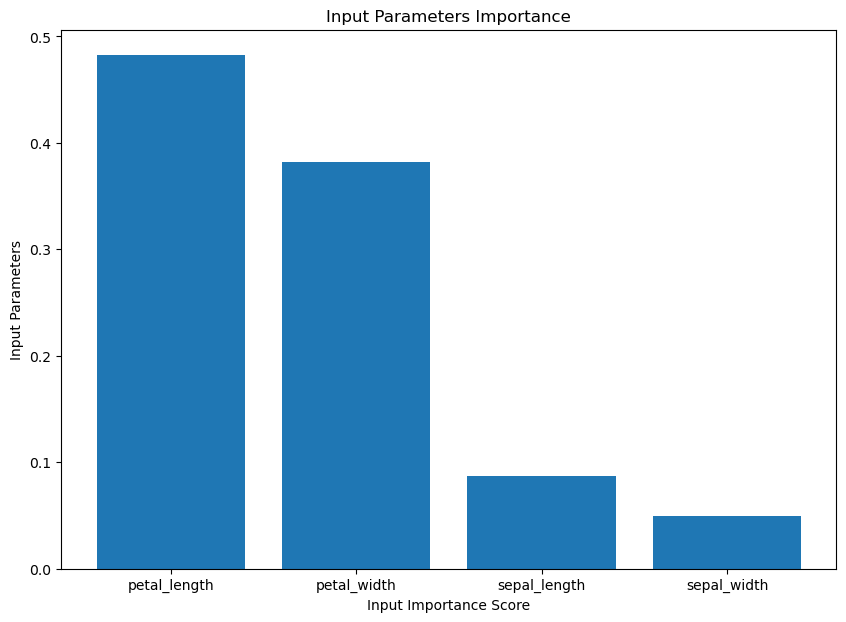

In [21]:
#import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]

plt.bar(input_parameters.index,input_parameters.values)
plt.title('Input Parameters Importance')
plt.xlabel('Input Importance Score')
plt.ylabel('Input Parameters')

In decision trees, features represent the variables or attributes that the tree uses to make predictions. Some key points:
- Features are the input data columns that the decision tree analyzes to derive rules and make splits. They can be categorical or continuous.
- At each node in the tree, the algorithm selects the feature that best splits the data into distinct target classes. This forms the branching rules.
- Features that result in nodes near the top of the tree contribute to predictions earlier and have higher importance.
- Feature importance refers to techniques that calculate how useful or valuable each feature is in constructing the decision tree model.
- Importance is determined by metrics like Gini impurity, information gain, decrease in variance for regression trees.
- Features used higher up in a decision tree to make key early splits have higher importance.
- The most important features help the decision tree model predict the target variable more accurately.
- Feature importance helps in feature selection, removes irrelevant features, and provides interpretability into which features drive the decision process.

As we saw in notebook 1, it's the petal measurements that have the most importance for predicting the species.

AUROC (Area Under the Receiver Operating Characteristic) curve considers true vs false positives/negatives at different thresholds to assess distinguishing power, which makes it more reliable for imbalanced data. The threshold refers to the cutoff value used to categorize predictions as positive or negative. It's important here because the petal features are by far the most important but there is some imbalance as we saw in the previous notebook.

Accuracy, on the other hand, only looks at the correct/incorrect predictions and can be skewed by class imbalance.  Let's compare the decision tree and random forest classifiers

In [22]:
clf = dict()
clf['Decision Tree'] = tree.DecisionTreeClassifier(criterion='entropy', splitter='best').fit(X_train,y_train)
clf['Random Forest'] = ensemble.RandomForestClassifier(n_estimators=10, random_state=0).fit(X_train,y_train)

fig = plt.figure(figsize=[10,10])

print('AUROC\tModel')
for i, curr_mdl in enumerate(clf):    
    yhat = clf[curr_mdl].predict_proba(X_test.values)[:,1]
    score = roc_auc_score(y_test, clf[curr_mdl].predict_proba(X_test), multi_class='ovr')
    print('{:0.3f}\t{}'.format(score, curr_mdl))
   

AUROC	Model
0.983	Decision Tree
0.998	Random Forest


<Figure size 1000x1000 with 0 Axes>

Even though the iris dataset is cleaned and quite well distributed, Random forest can still significantly improve the prediction accuracy over the decision tree classifier.

It is sometimes useful to view all the individual decision trees (estimators) that make up the ensemble from the fitted Random Forest model. Each estimator uses a sub-sample of the dataset.  The Random Forest classifer uses averaging across the estimators to control over-fitting and cancel out any noise in the dataset.

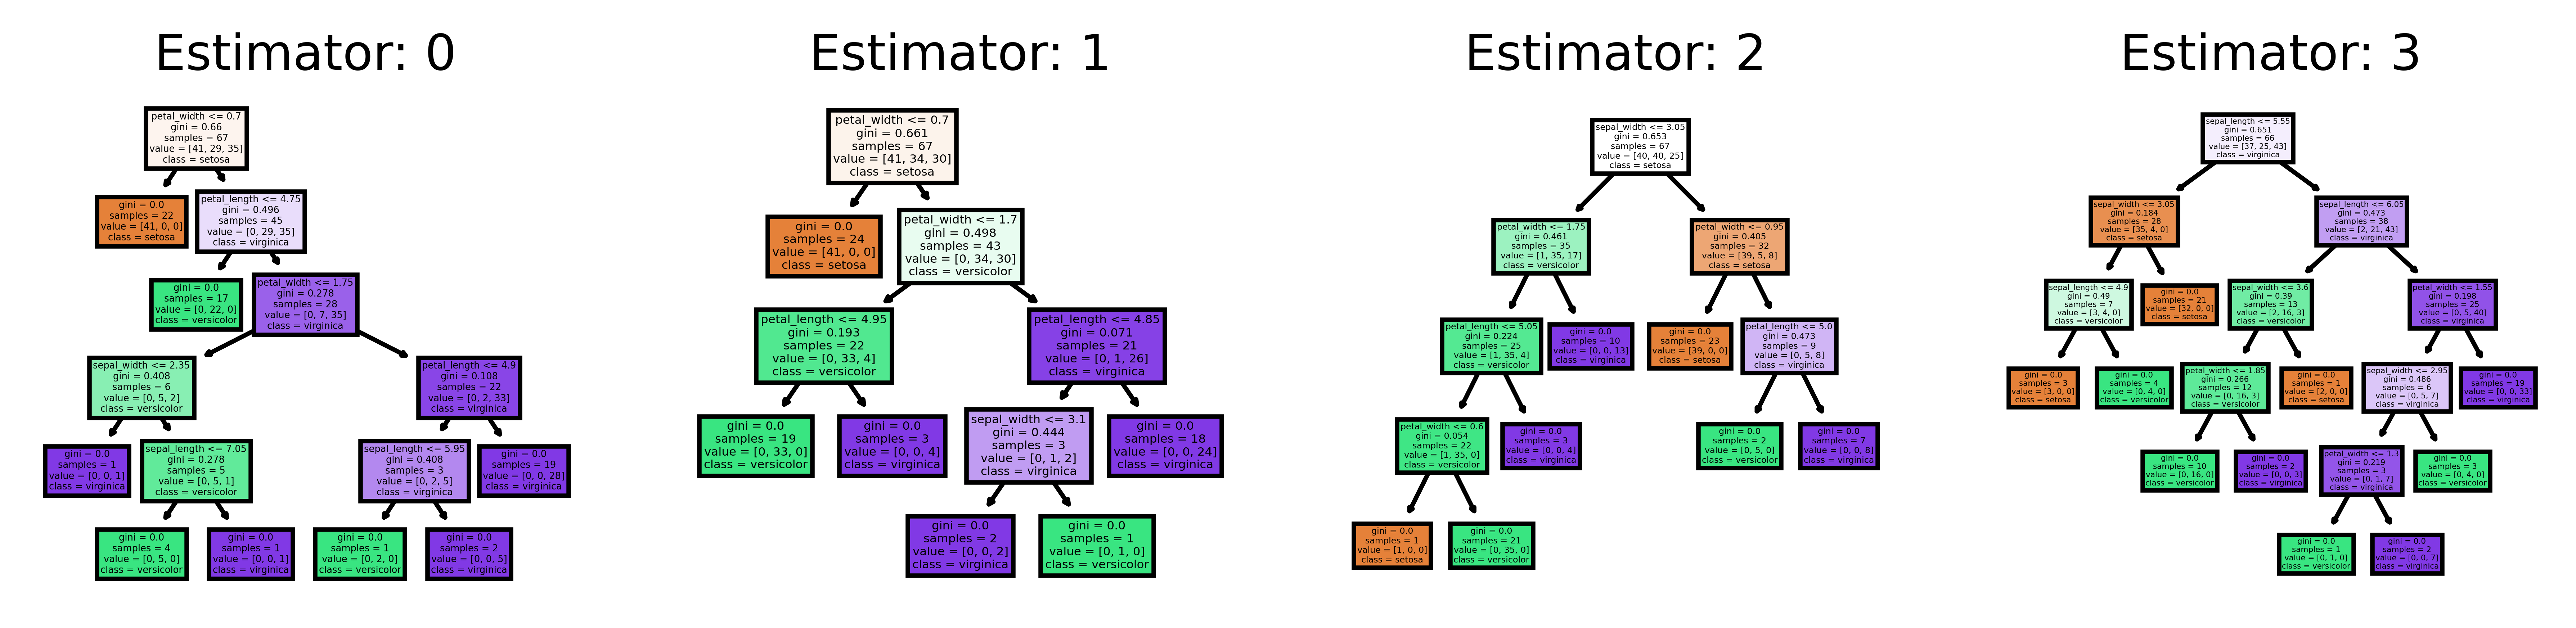

In [24]:
fn=iris.feature_names
cn=iris.species_names
fig, axes = plt.subplots(nrows = 1,ncols = 4,figsize = (10,2), dpi=900)
for index in range(0, 4):
  tree.plot_tree(clf['Random Forest'].estimators_[index],
               feature_names = fn, 
               class_names=cn,
               filled = True,
               ax = axes[index]);
  axes[index].set_title('Estimator: ' + str(index), fontsize = 11)

A decision boundary plot visually depicts the boundary or boundaries that a classifier used to separate classes in a multi-dimentional space.  It's a useful tool for interpreting and evaluating classification models.
Boundaries help assess if the modell is appropriately generalizing the training data.  Smooth boundaries indicate better generalization. Unintuitive or irregular boundaries reveal areas of improvement to the model. For example, the blue area representing Virginica species, is divided into two which is unexpected.

The plot code below is divided into two section:
* plot decision boundary for pedal width vs pedal length
    - This section of the code draws the shaded boundaries according to the species: red: setosa, yellow: versicolor, blue: virginica.
* plot test data points
    - This section of the code plots the points onto the shaded map just described.

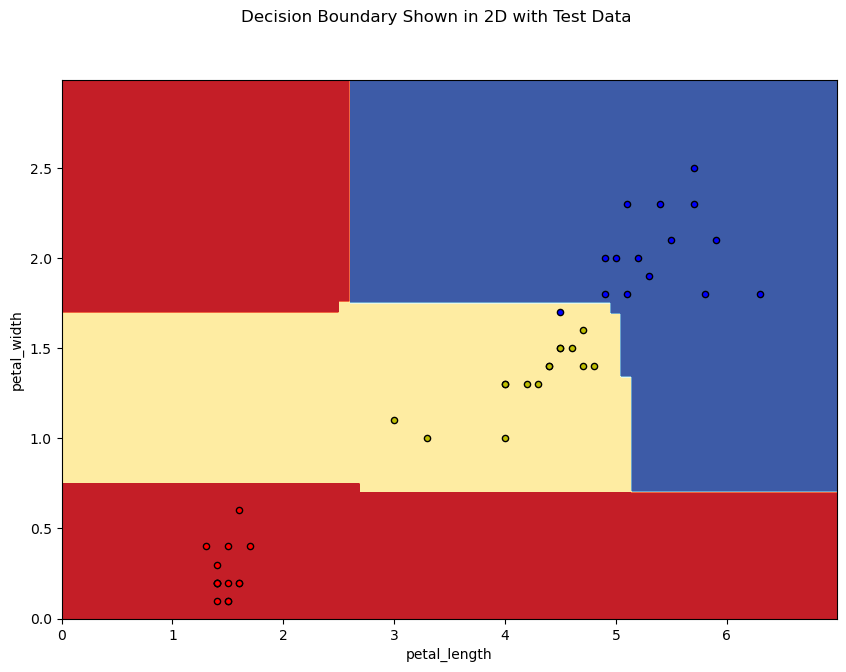

In [25]:
# plot decision boundary for pedal width vs pedal length
cn = ['setosa', 'versicolor', 'virginica']
plot_step = 0.01
plot_colors = "ryb"
xx, yy = np.meshgrid(np.arange(0, 7, plot_step), np.arange(0, 3, plot_step))
plt.tight_layout(h_pad=1, w_pad=1, pad=2.5)

selected_predictors = ["petal_length", "petal_width"]
mod_dt_1 = RandomForestClassifier(max_depth = 3, random_state = 1)
y_train_en = y_train.replace({'setosa':0,'versicolor':1,'virginica':2}).copy()
mod_dt_1.fit(X_train[selected_predictors],y_train_en)

pred_all = mod_dt_1.predict(np.c_[xx.ravel(), yy.ravel()])
pred_all = pred_all.reshape(xx.shape)

graph = plt.contourf(xx, yy, pred_all, cmap=plt.cm.RdYlBu)

plt.xlabel(selected_predictors[0])
plt.ylabel(selected_predictors[1])

# plot test data points
n_class = 3
for i, color in zip(cn, plot_colors):
    temp = np.where(y_test == i)
    idx = [elem for elems in temp for elem in elems]
    plt.scatter(X_test.iloc[idx, 2], X_test.iloc[idx, 3], c=color, 
                label=y_test, cmap=plt.cm.RdYlBu, edgecolor='black', s=20)

plt.suptitle("Decision Boundary Shown in 2D with Test Data")
plt.axis("tight");

Examining decision boundaries is a great way to learn how the training data we select affects performance and the ability for our model to generalize. Visualization of decision boundaries can illustrate how sensitive models are to each dataset, which is a great way to understand how specific algorithms work, and their limitations for specific datasets.

Here, for the most part all of the points fit well within their boundaries. Random Forest improvement is explained by the improvement in drawing those boundaries, and also the fact that my boundaries don't need to be linear. Random Forest would be expected to perform better with non-linear datasets.

## Please proceed to Notebook 3